# PSA Hackathon Data Making

In [60]:
import pandas as pd
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

---
# Dataset I: Controlling Traffic of Cargo Vessels

## Creating 1000 Datasets of Vessels

In [97]:
#Random Seed
random.seed(404)

# Create the DataFrame
df_traffic_control = pd.DataFrame({
    'Vessel_ID': range(1, 1001),
    'Timestamp_Entry': [datetime.now() - timedelta(hours=random.randint(1, 1000)) for _ in range(1000)],
    'Timestamp_Exit': [datetime.now() + timedelta(hours=random.randint(1, 1000)) for _ in range(1000)],
    'Containers_Unloaded (TEUs)': [random.randint(500, 4000) for _ in range(1000)],
    'Containers_Loaded (TEUs)': [random.randint(500, 4000) for _ in range(1000)]
})

# Add 'Time' column by calculating the difference between 'Timestamp_Exit' and 'Timestamp_Entry'
df_traffic_control['Time'] = df_traffic_control['Timestamp_Exit'] - df_traffic_control['Timestamp_Entry']

df_traffic_control


,Vessel_ID,Timestamp_Entry,Timestamp_Exit,Containers_Unloaded (TEUs),Containers_Loaded (TEUs),Time
0,1,2023-09-26 20:17:32.143841,2023-10-17 11:17:32.153219,2603,2238,20 days 15:00:00.009378
1,2,2023-08-21 20:17:32.143841,2023-11-06 16:17:32.153219,1994,2987,76 days 20:00:00.009378
2,3,2023-09-13 06:17:32.143841,2023-10-25 05:17:32.153219,3200,3126,41 days 23:00:00.009378
3,4,2023-08-23 13:17:32.143841,2023-11-05 02:17:32.153219,3047,1189,73 days 13:00:00.009378
4,5,2023-09-30 10:17:32.143841,2023-10-29 20:17:32.155065,2316,1796,29 days 10:00:00.011224
...,...,...,...,...,...,...
995,996,2023-08-29 22:17:32.153219,2023-10-19 05:17:32.160606,2127,3879,50 days 07:00:00.007387
996,997,2023-09-20 15:17:32.153219,2023-10-19 14:17:32.160606,3046,3717,28 days 23:00:00.007387
997,998,2023-09-10 16:17:32.153219,2023-11-07 11:17:32.160606,1004,2093,57 days 19:00:00.007387
998,999,2023-09-02 17:17:32.153219,2023-11-04 06:17:32.160606,3842,1587,62 days 13:00:00.007387


In [99]:
# Convert 'Time' column to hours and store in a new column 'Time_in_Hours'
df_traffic_control['Time_in_Hours'] = df_traffic_control['Time'].dt.total_seconds() / 3600


## Time Spent in Vessel

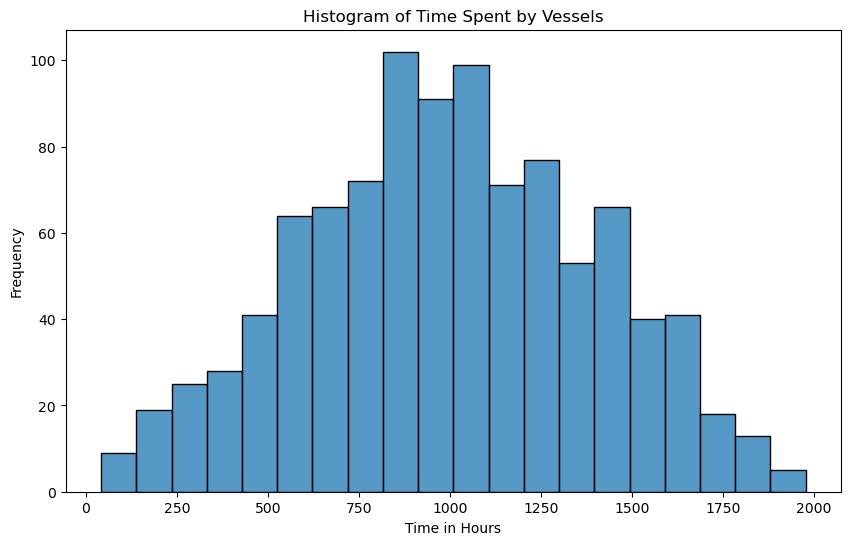

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(df_traffic_control['Time_in_Hours'], bins=20)
plt.title('Histogram of Time Spent by Vessels')
plt.xlabel('Time in Hours')
plt.ylabel('Frequency')
plt.show()


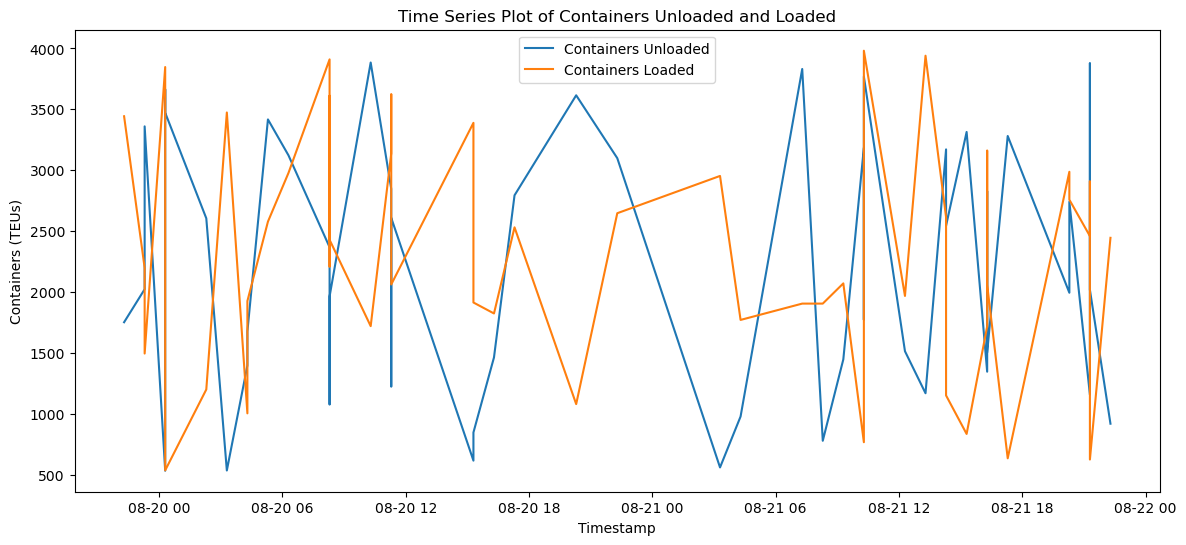

In [102]:
# Sort DataFrame by 'Timestamp_Entry'
df_sorted = df_traffic_control.sort_values('Timestamp_Entry').head(50)  # Taking only first 50 records for better visibility

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['Timestamp_Entry'], df_sorted['Containers_Unloaded (TEUs)'], label='Containers Unloaded', color='tab:blue')
plt.plot(df_sorted['Timestamp_Entry'], df_sorted['Containers_Loaded (TEUs)'], label='Containers Loaded', color='tab:orange')
plt.title('Time Series Plot of Containers Unloaded and Loaded')
plt.xlabel('Timestamp')
plt.ylabel('Containers (TEUs)')
plt.legend()
plt.show()


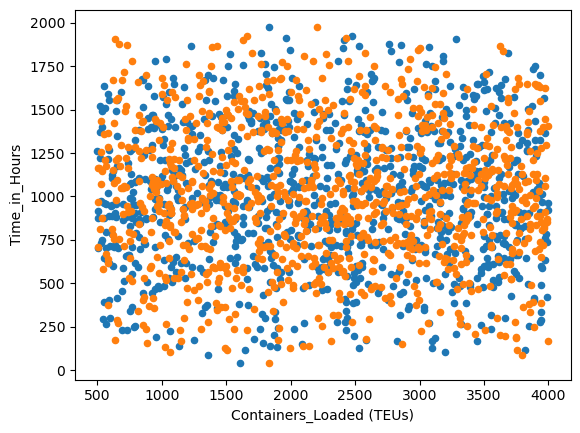

In [103]:
ax1 = df_traffic_control.plot(kind='scatter', x='Containers_Unloaded (TEUs)', y='Time_in_Hours', color='tab:blue')    
ax2 = df_traffic_control.plot(kind='scatter', x='Containers_Loaded (TEUs)', y='Time_in_Hours', color='tab:orange', ax=ax1)    

## Heatmap

In [104]:
# Extract the day from the timestamps
df_traffic_control['Entry_Day'] = df_traffic_control['Timestamp_Entry'].dt.day
df_traffic_control['Exit_Day'] = df_traffic_control['Timestamp_Exit'].dt.day


# Count the frequency of ships for each day
entry_day_count = df_traffic_control['Entry_Day'].value_counts().sort_index()
exit_day_count = df_traffic_control['Exit_Day'].value_counts().sort_index()

# Create a DataFrame for the heatmap
df_heatmap_days = pd.DataFrame({
    'Entry': entry_day_count,
    'Exit': exit_day_count
}).fillna(0)

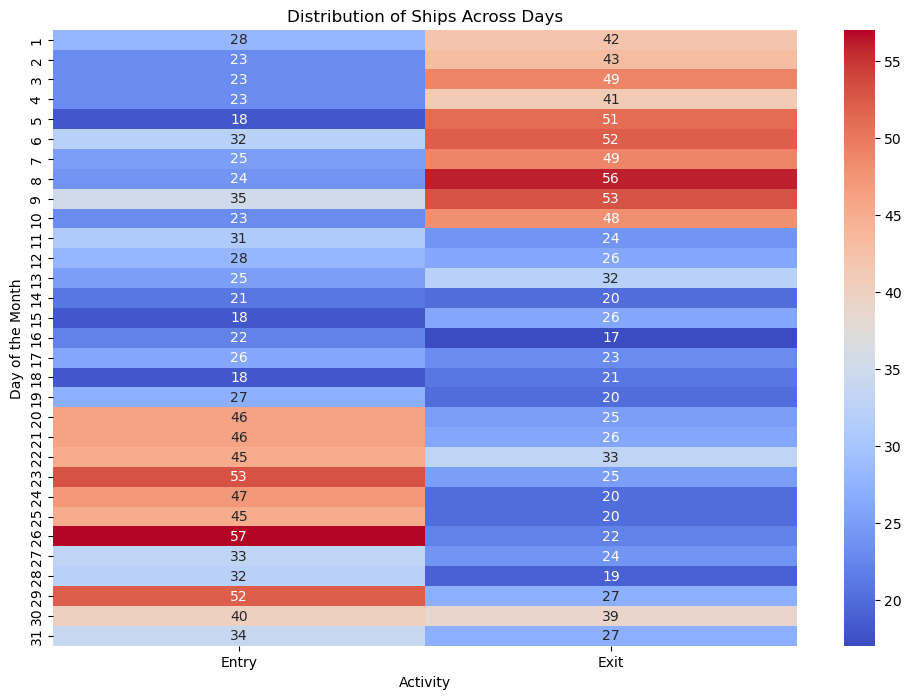

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_days, annot=True, cmap='coolwarm', fmt='g')
plt.title('Distribution of Ships Across Days')
plt.xlabel('Activity')
plt.ylabel('Day of the Month')
plt.show()

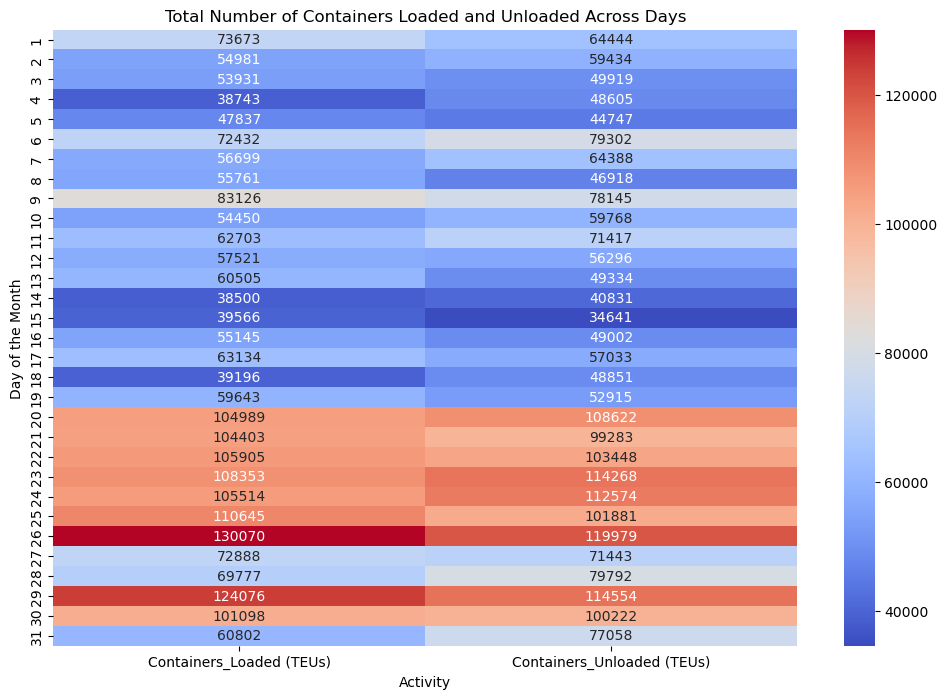

In [106]:
# Sum the total number of containers for each day
container_day_sum = df_traffic_control.groupby('Entry_Day')[['Containers_Loaded (TEUs)', 'Containers_Unloaded (TEUs)']].sum().sort_index()

# Create a DataFrame for the heatmap
df_heatmap_containers = pd.DataFrame(container_day_sum).fillna(0)


plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_containers, annot=True, cmap='coolwarm', fmt='g')
plt.title('Total Number of Containers Loaded and Unloaded Across Days')
plt.xlabel('Activity')
plt.ylabel('Day of the Month')
plt.show()


In [94]:
# # Create separate DataFrames for loaded and unloaded containers
# df_loaded = df_traffic_control[['Entry_Day', 'Containers_Loaded (TEUs)']]
# df_unloaded = df_traffic_control[['Entry_Day', 'Containers_Unloaded (TEUs)']]

# # Heatmap for Containers Loaded
# plt.figure(figsize=(12, 8))
# sns.heatmap(pd.pivot_table(df_loaded, values='Containers_Loaded (TEUs)', index=['Entry_Day'], columns='Entry_Day', fill_value=0), annot=True, cmap='coolwarm', fmt='g')
# plt.title('Total Number of Containers Loaded Across Days')
# plt.xlabel('Day of the Month')
# plt.ylabel('Day of the Month')
# plt.show()

# # Heatmap for Containers Unloaded
# plt.figure(figsize=(12, 8))
# sns.heatmap(pd.pivot_table(df_unloaded, values='Containers_Unloaded (TEUs)', index=['Entry_Day'], columns='Entry_Day', fill_value=0), annot=True, cmap='coolwarm', fmt='g')
# plt.title('Total Number of Containers Unloaded Across Days')
# plt.xlabel('Day of the Month')
# plt.ylabel('Day of the Month')
# plt.show()


---
# Dataset II: Container Availability Optimization


In [118]:
df_container_availability = pd.DataFrame({
    'Container_ID': range(1, 10001),
    'Container_Status': [random.choices(['Available', 'In-Use', 'Maintenance'], weights=(4,20,1)) for _ in range(10000)],
    'Container (TEUs)':[random.choice([1,2]) for _ in range(10000)],
    'Last_Maintenance_Date': [datetime.now() - timedelta(days=random.randint(1, 1000)) for _ in range(10000)],
    'Predicted_Maintenance_Date': [datetime.now() + timedelta(days=random.randint(1, 100)) for _ in range(10000)],
})



df_container_availability['Next_Maintenance_Date'] = df_container_availability['Predicted_Maintenance_Date'] + timedelta(days=random.randint(1, 1000))
    
df_container_availability

,Container_ID,Container_Status,Container (TEUs),Last_Maintenance_Date,Predicted_Maintenance_Date,Next_Maintenance_Date
0,1,[In-Use],1,2021-06-25 14:43:44.960704,2023-12-04 14:43:45.023410,2025-06-11 14:43:45.023410
1,2,[In-Use],1,2021-09-25 14:43:44.960704,2023-10-13 14:43:45.023410,2025-04-20 14:43:45.023410
2,3,[In-Use],2,2023-03-14 14:43:44.960704,2023-11-01 14:43:45.023410,2025-05-09 14:43:45.023410
3,4,[In-Use],2,2021-12-02 14:43:44.960704,2023-11-25 14:43:45.023410,2025-06-02 14:43:45.023410
4,5,[In-Use],2,2022-03-13 14:43:44.960704,2023-10-09 14:43:45.023410,2025-04-16 14:43:45.023410
...,...,...,...,...,...,...
9995,9996,[In-Use],2,2022-05-09 14:43:45.023410,2023-10-31 14:43:45.085524,2025-05-08 14:43:45.085524
9996,9997,[In-Use],1,2023-05-23 14:43:45.023410,2023-12-10 14:43:45.085524,2025-06-17 14:43:45.085524
9997,9998,[Available],2,2022-06-30 14:43:45.023410,2024-01-05 14:43:45.085524,2025-07-13 14:43:45.085524
9998,9999,[In-Use],1,2021-07-14 14:43:45.023410,2023-12-07 14:43:45.085524,2025-06-14 14:43:45.085524


---
## Save files

In [8]:
# Save to CSV
# df_container_availability.to_csv('container_availability.csv', index=False)
# df_traffic_control.to_csv('traffic_control.csv', index=False)
